In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Classification

The Linear regression model assumes that the response variable Y is quantitative. But in many situations the response is qualitative instead. The process of predicting the qualitative responses is called classification. Often in classification, the methods first predict the probability of each of the categories of a qualitative variable, as the basis for making the classification.
The three of the most widely used classifiers are: logistic regression, linear discriminant analysis and K nearest neighbours.

Why is linear regression not appropriate in the case of a qualititative response? This is because in general there is no natural way to convert a qualitative response variable with more than two levels (classes) into a quantitative response that is optimal/ready for linear regression.

# Logistic Regression

Logistic regression models the probability that y belongs to a particular category
Let us have a look at its model.

## Logistic Model

If we use the model <strong> P(X) = beta_0 + beta_1 * X </strong>, we would get values which are less than 0 and more than 1. These predictions theoretically don't make sense since the true probability must fall between 0 and 1. (Another reason, why linear regression might not be a good idea in some cases wheren qualitative responses are in play) So to avoid this problem, we must model P(x) using a function that always gives the output between 0 and 1 for all values of X. One of such functions is the logistic function:

<strong> Y = 1 / (1 + e^(-t)) where t = beta_0 + beta_1 * X </strong>

Some more algebra can show that :  <strong> log( p(x)/ ( 1 - p(X)) = beta_0 + beta_1 * X  </strong>

The expression P(X) / (1 - P(X)) is known as <strong> odds </strong>. What logistic regression is saying is that the log odds are modelled by a linear model which can be solved by linear regression. There is no linear relationship between the probability of being in a certain class and X is logistic regression because of the need to have the probabilities between 0 and 1.

The Logistic function will always produce an S shaped curve and so regardless of the value of X, we will obtain sensible information.

## Estimating the Regression Coefficients

In linear rregression, the model coeffiecients were found by minimizing the squared residuals.<strong> Beta_0 and Beta_1 </strong> must be estimated based on training data. Although least squared method could be used, in logistic regression, in order to estimate the coefficients, the more general method of maximum likelihood is preffered since it has better statistical properties. maximum Likelihood multiplies the model probability for each observation together and chooses parameters that maximize the number. The basic intuition behind it is as follows:

we seek estimates for <strong> Beta_0 and Beta_1 </strong> such that the predicted probability p_hat(x_i) for each individual corresponds as closely as possible to the individual's record. This intuition can be formalized into a mathematical equation called a likehlihood function.

<strong> L(ß_0, ß_1) = π p(x_i) π (1 - p(x_i)) </strong>

The estimates ß_hat_0 and ß_hat_1 are chosen to maximize this likelihood function. The least squares method infact is a special case of maximum likelihood.

In [5]:
default = pd.read_csv("Default.csv")
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [7]:
default['Yes'] = (default['default'] == 'Yes').astype(int)
results = smf.logit('Yes ~ balance', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Sep 2019   Pseudo R-squ.:                  0.4534
Time:                        13:17:44   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

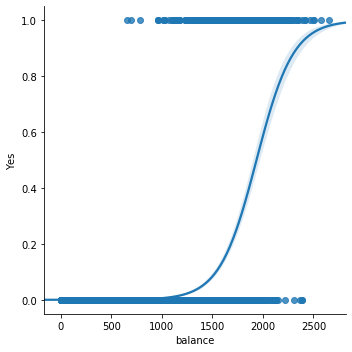

In [8]:
# Looks quite a bit different than the linear regression model
sns.lmplot('balance', 'Yes', data=default, logistic=True)

## Making Predictions
Once the Coefficients have been estimated, it is easier to calculate the probability of the response variable. Once can use qualitative predictors with the logistic regression model using the dummy variable approach.


## Multiple Logistic Regression

It can be generated as <strong> log( P(x) / (1 -P(x) ) = ß_0 + ß_1 * X_1 ----- + ß_p * X _p </strong>



In [9]:
results = smf.logit('Yes ~ balance + student', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sun, 15 Sep 2019   Pseudo R-squ.:                  0.4619
Time:                        13:26:51   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.7495      0.369    -29.115      0.000     -11.473     -10.026
student[T.Yes]    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
balance            0.0057      0.000     24.748      0.000       0.005       0.006
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Simpsons paradox

In [10]:
results = smf.logit('Yes ~ student', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Sep 2019   Pseudo R-squ.:                0.004097
Time:                        13:27:38   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student[T.Yes]     0.4049      0.115      3.520      0.000       0.179       0.630
==================================================================================
"""

The first model (the multiple logistic regression model) shows a negative relationship between the student and the response (Negative Coefficient). This means that being a student decreases the likelihood of defaulting. The second model shows the exact opposite by stating that being a student increases the chances of defaulting. 
This can be explained by the fact that students have more debt on average but compared to those with the same amount of debt, they are less likely to default.

## Multiclass Logistic Regression
The book does not cover the logistic regression with more than 2 classes. 
Mental Note: DO it on your own.

### One vs All
A simple method when you have k classes where k > 2 is to create k-1 independent logistic regression classifiers by choosing the response variable to be binary, 1 when in the current class else 0.

# Linear Discriminant Analysis

In this alternative approach, we model the distribution of the predictors X seperately in each of the response classes and then Use Baye's theorem to flip these around into estimates for P(Y = k | X = x). When these distributions are assumed to be normal, it turns out that the model is very similar in form to logistic regresion.

One might ask: Why is this method needed?:

1. When classes are well seperated, the parameter estimates for the logistic regression model are surprisingly unstable. This is not the case with LDA.

2. If n is small and the distribution of the predictors X is approximately normal in each of the classes, the LDA model is again more stable.

## Baye's Theorem For Classification

We wish to classify an observation into one probability that a randomly chosen observation comes from the kth class. Let F_k(x) = p(X = x | Y = k) denote the density function of X for an observation that comes from a kth class. 
Baye's theorem states that P(Y = k| X =x) = π_k * f_k / (∑π_l * f_l(x)).
In general, estimating π_k is very easy if we have a random sample of Y's from the population.



## LDA (p =1)

In order to estimate f_k(X) we will first make a few assumtptions about its form. Suppose that we assume f_k(x) is normal or gaussian. In the one dimensional setting, the normal density takes the form

<strong> f_k(x) = 1 / (√(2π *sigma_k) * exp(1 / (sigma_k^2) * (x - µ_k)^ 2) </strong>

where µ_k and sigma_k^2 are the mean and variance parameters of the kth class. For now let us further assume that there is shared variance between all the classes. Hence we find that


<strong> P(Y = k | X = x) = π_k * 1 / (√(2π *sigma_k) * exp(1 / (sigma_k^2) * (x - µ_k)^ 2) / (∑π_if_i(x)) </strong>

The Baye's classifier involves assigning an observation X = x to the class for which the above expression's value is the largest.

In practise, even if we are certain of our assumption that X is drawn from a guassian distribution within each class, we still have to estimate the parameters µ_1, µ_2, µ_3... and π_1,π_2,π_3... and sigma^2. The LDA approximates the Baye's Classifier by plugging the estimates for π_k, µ_k and sigma^2:

<strong>
µ_k = ∑x/n_k

sigma = ∑∑(x_i - µ_k)^2/(n - k)

π_k = n_k / n
</strong>

## LDA (p>1)

We now extend the LDA classifier to the case of multiple predictors. To do this we will assume that X is drawn from a multivariate Gaussian Distribution with a class specific mean vector and a common covariance matrix.

<strong> Multivariate Gaussian Distribution: Assumes each predictor follows a one-dimensional normal distribution with some coprrelation between each pair of predictors. To indicate that a p dimensional random variable X has multivariate Gaussian distribution, we write X ˜ N(µ, ∑) where E(X) = µ.

f(x) = 1/(2π^(p/2) * |∑|^1/2) * exp(1/2 * (x - µ)^T * ∑ ^-1 * (x - µ))

In the cas eof p > 1 predictors, the lDA classifier assumes that the observations in the kth class are drawn from a multivariate Gaussian distribution.
</strong>

Plugging the density function for the Kth class into the equation P(Y =k| X=x) and performing a little bit of algebra, reveals that the Bayes Classifer assigns an observation X = x to the class for which

expression = X.T * ∑ ^ -1 *µ_k - 1/2 µ_k.T * ∑ ^-1 *µ_k + log(π_k) is the largest

As the threshold is reduced, the error rate among individuals who default decreases but the error rate among the individuals who do not default increases. How can one decide which threshold value is the best? Such a decision must be made based obn domain Knowledge.

The ROC curve is a popular graphic for simultaneoulsy displaying the two types of errors for all the possible thresholds. The overall performance and of a classifier, summarized over all possible thresholds is given by the area under the ROC curve (AOC). An ideal ROC curve will hug the top left corner so the larger the AUC, the better the classifer. ROC curves are useful for comparing the different classifiers since they take into account all the possible threshholds.

# Quadratic Discriminant Analysis

LDA assumes that the observations within each class are drawn from a multivariate gaussian distribution with a class specific mean vector and a covariance matrix that is common to all the classes. QDA assumes that observations are drawn from a Gaussian Distribution but each class has its own covariance matrix. under this assumption, The Baye's classifer assigns an observation X = x to the class for which

expression = - 1/2 (x - µ_k).T * ∑ ^-1 *(x - µ_k) - 1/2 log|∑_k| + log(π_k)
is the largest.

This might one beg the question that why does it matter if each class has its own covariance matrix? The answer lies in the bias-variance tradeoff.

LDA is much less flexible than QDA and thus has low variance. This can potentially lead to improved prediction performance. but there is a tradeoff. If LDA's assumption that the K classes share a common covariance matrix is badly off, then the LDA can suffer from high bias. Roughly speaking, the LDA tends to perform better than QDA if there are relatively low training observations and so reducing the varianc eis crucial. In contrast, QDA is suggested when the training data is very large so that the variance of the classifier is not a major concern or if the assumption of a common covariance matrix for the K classes is clearly untenable.

# Comparision Of Classification Methods

Though their motivations differ, the logistic regression and the LDA methods are closely connected. Both logistic regression and the LDA produce linear decision boundaries. The only difference is that ß_0 and ß_1 are estimated using maximum likelihood whereas c_0 and c_1 are calculated using the estimated mean and variance from a normal distribution. KNN is a non parametric approach. No assumptions are made about the shape of the decision boundary. Therefore we can expect this method to dominate the LDA and logistic regression when the decision boundary is highly non-linear. however, KNN doesnt tell us which predictions are important. this is where QDA comes into play. It serves as a compromise between the non paramtric KNN method and the LDA and the logistic regression method. Since QDA assumes a quadratic decision boundary, it can accurately model a wide range of problems as compared to the linear methods.

<strong> when true decision boundaries are linear then the LDA and logistic regression approaches will perform well. When boundaries are moderately non-linear QDA will give better results. Finally for more comp0licated decision boundaries, a non parametric method such as KNN can be superior.</strong>